In [1]:
from fun.show_histograms import *

In [2]:
folder = r'./data/fixation_over_time'
new_folder_name = 'WM_1'

### 1. Extract the polarimetric parameters in two ROIs

In [3]:
wavelength = '550'

for f in [os.listdir(folder)[0], os.listdir(folder)[8]]:
    
    if 'T0_' in f:
        
        path_res = os.path.join(folder, f, 'polarimetry', str(wavelength) + 'nm', '50x50_images', new_folder_name)
        mat = load_data_mm(os.path.join(folder, f), wavelength)[-1]
        
        with open(os.path.join(path_res, 'coordinates.txt')) as f:
            coordinates = f.readlines()

        xs, ys = [], []
        for idx, coord in enumerate(coordinates):
            num_coord = int(coord.replace('\n', ''))
            if idx <= 1:
                ys.append(num_coord)
            else:
                xs.append(num_coord)
                
        data_all = parameters_histograms(mat, xs, ys, path_res)
    
    else:
        
        path_res = os.path.join(folder, f, 'polarimetry', str(wavelength) + 'nm', '50x50_images', new_folder_name + '_align')
        with open(os.path.join(path_res, 'data_raw.pickle'), 'rb') as handle:
            raw_data = pickle.load(handle)

100%|█████████████████████████████████████████████████████████████████████████████| 388/388 [00:00<00:00, 14470.19it/s]


In [4]:
# get the values for linear retardance, depolarization and azimuth before and after fixation
linear_retardance_before = data_all['linR']
linear_retardance_after = raw_data[0][0][3]

depolarization_before = data_all['totP']
depolarization_after = raw_data[0][3][3]

azimuth_before = data_all['azimuth']
azimuth_after = raw_data[0][2][3]

### 2. Plot the distribution of the parameters in the ROIs

In [5]:
keys = ['Linear retardance (°)', 'Depolarization', 'Azimuth of optical axis (°)']
parameters = [[linear_retardance_before, linear_retardance_after], [depolarization_before, depolarization_after],
             [azimuth_before, azimuth_after]]

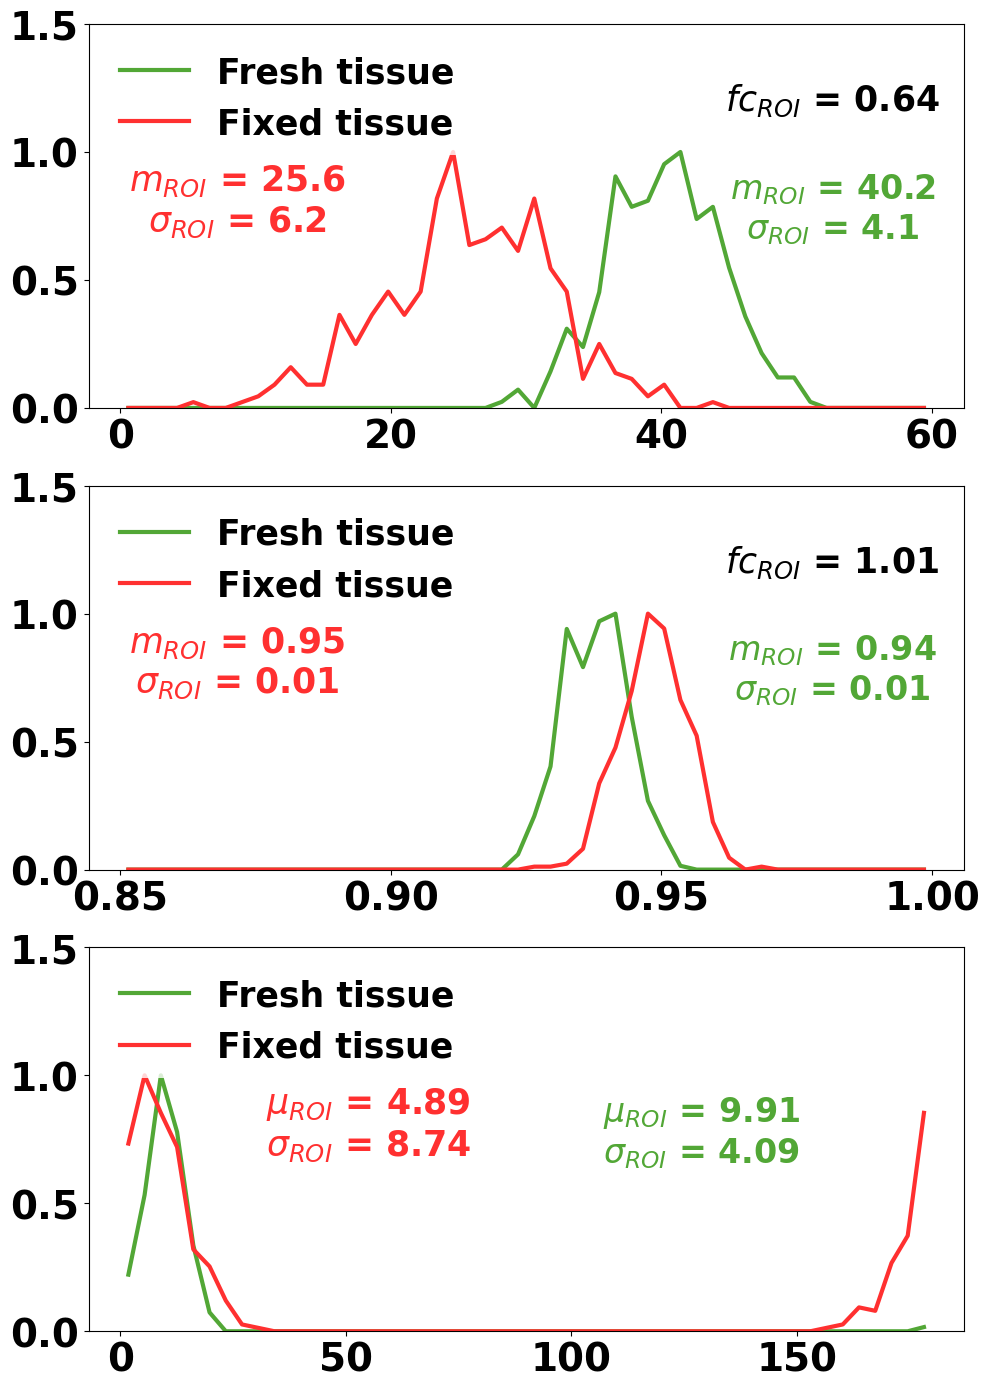

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,14))

for i, key, param in zip(range(0,3), keys, parameters):
    row = i
    ax = axes[row]
    
    # change the range of the histograms
    if key == 'Depolarization':
        range_hist = (0.85, 1)
    elif key == 'Linear retardance (°)':
        range_hist = (0, 60)
    else:
        range_hist = (0, 180)
        
        
    for idx_p, vals in enumerate(param):
        y, x = np.histogram(
            vals,
            bins=50,
            density=False,
            range = range_hist)
        
        x_plot = []
        for idx, x_ in enumerate(x):
            try: 
                x_plot.append((x[idx] + x[idx + 1]) / 2)
            except:
                pass
            
        # get the mean, max and std
        max_ = x[np.argmax(y)]
        if key == 'Azimuth of optical axis (°)':
            mean = average_angles(vals)
            differences = []
            for v in vals:
                differences.append(subtract_angle(mean, v) * subtract_angle(mean, v))
            std = np.sqrt(np.sum(differences)/len(differences))
        else:
            mean = np.nanmedian(vals)
            std = np.nanstd(vals)
        
        if idx_p == 0:
            mean_bf = mean
        else:
            mean_af = mean
            
        y = y / np.max(y)
        
        # plot the histogram
        if idx_p == 0:
            color = '#52a736'
            line1, = ax.plot(x_plot, y, c = color, linewidth=3)
        else:
            color = '#FF3030'
            line2, = ax.plot(x_plot, y, c = color, linewidth=3)

        
        ax.axis(ymin=0,ymax=1.5)
        ax.locator_params(axis='y', nbins=4)
        ax.locator_params(axis='x', nbins=5)
        
        
        if idx_p == 0:
            if key == 'Azimuth of optical axis (°)':
                ax.text(0.70, 0.52, '$\mu_{ROI}$' + ' = {:.2f}\n'.format(mean) + '$\sigma_{ROI}$' + ' = {:.2f}'.format(std), 
                    horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, 
                    fontsize=24, fontweight = 'bold', c = color)
            else:
                if key == 'Depolarization':
                    ax.text(0.85, 0.52, '$m_{ROI}$'+ ' = {:.2f}\n'.format(mean) + '$\sigma_{ROI}$'+' = {:.2f}'.format(std), 
                            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, 
                            fontsize=24, fontweight = 'bold', c = color)
                else:
                    ax.text(0.85, 0.52, '$m_{ROI}$'+ ' = {:.1f}\n'.format(mean) + '$\sigma_{ROI}$'+' = {:.1f}'.format(std), 
                            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, 
                            fontsize=24, fontweight = 'bold', c = color)

        else:
            if key == 'Azimuth of optical axis (°)':
                ax.text(0.32, 0.54, '$\mu_{ROI}$' + ' = {:.2f}\n'.format(mean) + '$\sigma_{ROI}$' + ' = {:.2f}'.format(std), 
                    horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, 
                    fontsize=25, fontweight = 'bold', c = color)
            else:
                ax.text(0.85, 0.75, '$fc_{ROI}$'+ ' = {:.2f}\n'.format(mean / mean_bf), 
                        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, 
                        fontsize=25, fontweight = 'bold')

                if key == 'Depolarization':
                    ax.text(0.17, 0.54, '$m_{ROI}$'+ ' = {:.2f}\n'.format(mean) + '$\sigma_{ROI}$'+' = {:.2f}'.format(std), 
                        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, 
                        fontsize=25, fontweight = 'bold', c = color)
                
                else:
                    ax.text(0.17, 0.54, '$m_{ROI}$'+ ' = {:.1f}\n'.format(mean) + '$\sigma_{ROI}$'+' = {:.1f}'.format(std), 
                        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, 
                        fontsize=25, fontweight = 'bold', c = color)
                
            
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(28)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(28)
        tick.label1.set_fontweight('bold')
            
    # ax.set_title(param[0], fontdict = {'fontsize': 30, 'fontweight': 'bold'})
    # ax.set_ylabel('Normalized pixel number', fontdict = {'fontsize': 20, 'fontweight': 'bold'})
        
    # save the figures
    plt.tight_layout()
    legend_properties = {'weight':'bold', 'size': 25}

    leg = ax.legend([line1, line2], ['Fresh tissue', 'Fixed tissue'], prop=legend_properties, loc = 2)
    leg.get_frame().set_linewidth(0.0)
    
plt.savefig(os.path.join(path_res, 'summary_histo.pdf'))